In [82]:
from source.utils import get_dataFrame_withShortCols


In [89]:
data = get_dataFrame_withShortCols()

In [90]:
data

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11084972,32554904,31Dec2020 0:00:00,1.0,Approved,2,1.0,1,49200,111,...,2,2,0,NaN,NaN,0,0,0,12832,0.783954
49996,11084973,32884069,31Dec2020 0:00:00,NaN,Rejected,1,2.0,1,25600,30,...,3,4,0,NaN,NaN,0,0,0,12832,0.172590
49997,11084974,32433438,31Dec2020 0:00:00,0.0,Approved,1,1.0,1,46700,18,...,0,0,0,9288.87,255018.31,0,0,0,12832,0.060722
49998,11084975,32877592,31Dec2020 0:00:00,NaN,Rejected,1,1.0,Direct,44300,162,...,3,3,102000,NaN,NaN,0,0,10,12832,0.845866


In [91]:
nulle = data.isna().sum().reset_index(name='Num_of_null')
nulle[nulle['Num_of_null'] != 0]

,index,Num_of_null
3,Default indicator,13282
6,Loan purpose,1403
7,Distribution channel,1403
12,Value of the goods,29173
14,income of second applicant,37538
16,profession of second applicant,37538
21,Spendings estimation,40
22,Property ownership for property renovation,37416
23,Clasification of the vehicle,29173
29,Amount on current account,10088


In [92]:
data.head(5)

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913


In [93]:
data.dtypes

ID                                                int64
Customer ID                                       int64
Application date                                 object
Default indicator                               float64
Application_status                               object
Number of applicants                              int64
Loan purpose                                    float64
Distribution channel                             object
Application amount                                int64
Credit duration                                   int64
Payment frequency                                 int64
Installment amount                              float64
Value of the goods                              float64
income of main applicant                          int64
income of second applicant                      float64
profession of main applicant                      int64
profession of second applicant                  float64
employment date                                 

In [94]:
null_counts = data.isnull().sum()
null_columns = {}
null_col_over_half = {}
for column, count in null_counts.items():
    if count != 0:
        null_columns[column] = count
        if count >= data.shape[0]/2:
            null_col_over_half[column] = count

In [95]:
null_col_over_half

{'Value of the goods': 29173,
 'income of second applicant': 37538,
 'profession of second applicant': 37538,
 'Property ownership for property renovation': 37416,
 'Clasification of the vehicle': 29173}

## Loan purpose

In [96]:
data['Loan purpose'].unique()

array([ 2.,  1.,  3., nan])

In [97]:
data['Loan purpose'].value_counts()

Loan purpose
1.0    20262
3.0    16136
2.0    12199
Name: count, dtype: int64

### Jak loan purpose 3 lub null to jest więcej niż jeden aplikant 

In [166]:
data[data['Loan purpose'] == 3]

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
46,11035023,32849935,14Feb2010 0:00:00,NaN,Rejected,2,3.0,1,4000,36,...,3,3,18600,NaN,NaN,0,0,0,3899,0.028190
55,11035032,32613786,18Feb2010 0:00:00,0.0,Approved,2,3.0,2,2100,6,...,1,2,30600,6119.03,17319.56,0,0,10,3899,0.285065
71,11035048,32706660,22Feb2010 0:00:00,0.0,Approved,2,3.0,1,3300,30,...,0,0,15600,1023.97,4483.41,0,1,0,3899,0.721557
84,11035061,32806309,24Feb2010 0:00:00,0.0,Approved,2,3.0,1,3000,12,...,1,1,0,NaN,NaN,0,0,0,3899,0.850093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49902,11084879,32482030,25Dec2020 0:00:00,0.0,Approved,3,3.0,1,10500,18,...,4,4,0,13380.21,20107.01,0,0,0,12832,0.871158
49920,11084897,32640491,26Dec2020 0:00:00,NaN,Rejected,4,3.0,2,13100,15,...,0,0,0,6989.26,NaN,0,0,30,12832,0.015941
49961,11084938,32536190,29Dec2020 0:00:00,0.0,Approved,2,3.0,2,9000,9,...,0,0,0,6721.69,79048.11,0,0,10,12832,0.834344
49967,11084944,32726085,29Dec2020 0:00:00,NaN,Rejected,3,3.0,3,6700,12,...,0,0,0,26345.10,22376.09,0,0,0,12832,0.612188


In [167]:
data[data['Loan purpose'].isna()]

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
144,11035121,32640160,09Mar2010 0:00:00,0.0,Approved,2,NaN,NaN,9600,18,...,2,2,0,5018.60,27017.17,0,0,10,3899,0.432030
421,11035398,32481349,28Apr2010 0:00:00,NaN,Rejected,2,NaN,NaN,12200,42,...,2,2,0,8986.65,6246.54,0,0,0,3899,0.133368
439,11035416,32524896,30Apr2010 0:00:00,0.0,Approved,4,NaN,NaN,2700,9,...,2,2,0,NaN,NaN,0,0,0,3899,0.986729
468,11035445,32371686,06May2010 0:00:00,0.0,Approved,2,NaN,NaN,9600,63,...,1,1,0,8912.07,NaN,0,0,10,3899,0.851905
637,11035614,32492534,01Jun2010 0:00:00,0.0,Approved,2,NaN,NaN,12600,36,...,2,2,0,5572.45,12698.00,0,0,20,3899,0.117839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49123,11084100,32655129,05Nov2020 0:00:00,0.0,Approved,3,NaN,NaN,11900,12,...,3,3,0,8633.72,85116.74,0,0,10,12832,0.051811
49521,11084498,32844107,02Dec2020 0:00:00,NaN,Rejected,2,NaN,NaN,30600,126,...,0,0,0,13338.50,NaN,0,0,10,12832,0.081254
49804,11084781,32763492,19Dec2020 0:00:00,0.0,Approved,2,NaN,NaN,30200,21,...,2,3,0,38198.59,NaN,0,0,0,12832,0.365012
49810,11084787,32624057,19Dec2020 0:00:00,0.0,Approved,2,NaN,NaN,34700,39,...,6,8,0,NaN,NaN,0,0,0,12832,0.012212


In [123]:
data['Distribution channel'].value_counts()

Distribution channel
1         6006
2         4051
3         1974
Direct      79
Online      12
Name: count, dtype: int64

In [125]:
filt = data['Loan purpose'] == 1
data[['Distribution channel']][filt].value_counts()

Distribution channel
1                       2994
2                       1980
Direct                    29
Name: count, dtype: int64

In [135]:
filt2 = data['Distribution channel'] == 'Direct'
data[['Loan purpose']][filt2].value_counts()

Loan purpose
2.0             34
1.0             29
3.0             16
Name: count, dtype: int64

### Jak loan purpose jest null to distribuation channel też, inne powiązań nie ma tych dwóch kolumn (jedynie jak online to loan purpose 3 i jak channel 3 to loan też 3 zawsze) 

In [116]:
filt3 = data['Loan purpose'].isna()
data[['Distribution channel']][filt3]

,Distribution channel
144,NaN
421,NaN
439,NaN
468,NaN
637,NaN
...,...
49123,NaN
49521,NaN
49804,NaN
49810,NaN


In [137]:
data['Property ownership for property renovation'].value_counts()

Property ownership for property renovation
1.0    2677
0.0     504
Name: count, dtype: int64

### Jak property jest 1 lub 0 to loan albo 2 albo null, jak property null to loan jest 1 lub 3 lub null 
### jak loan jest 1 to same nulle w property 
### jak loan jest 2 to nie ma żadnych nulli 
### jak loan jest 3 to same nulle w property 

In [150]:
filt4 = data['Loan purpose'] == 2
data[['Property ownership for property renovation']][filt4].value_counts()

Property ownership for property renovation
1.0                                           2602
0.0                                            495
Name: count, dtype: int64

In [153]:
filt5 = data['Clasification of the vehicle'].isna()
data['Value of the goods'][filt5].value_counts()

Series([], Name: count, dtype: int64)

### Jeśli loan purpose jest 1 to nie ma nulli w pojazdach 

In [164]:
filt6 = data['Loan purpose'] == 3
data[['Clasification of the vehicle']][filt6].isna().sum()

Clasification of the vehicle    4022
dtype: int64

### Profession / income of second applicant - jak jeden aplikant (number of applicant) to wtedy jest null - zamienić na 0 lub wgl nie brać pod uwage jak jest 1 aplikant 

In [98]:
data['Number of applicants'].value_counts()

Number of applicants
1    37538
2     9050
3     2393
4     1019
Name: count, dtype: int64

In [100]:
data['profession of second applicant'].unique()

array([nan,  5.,  2.,  4.,  6.,  7.,  3.,  1.])

In [102]:
data.dropna(subset=['profession of second applicant', 'income of second applicant']).fillna(0)

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
9,11034986,32381161,04Feb2010 0:00:00,0.0,Approved,2,1.0,1,7900,24,...,1,1,0,2696.36,0.00,0,0,10,3899,0.379363
11,11034988,32649332,04Feb2010 0:00:00,0.0,Approved,2,2.0,1,11400,36,...,2,2,0,1543.52,16819.29,0,0,10,3899,0.656787
12,11034989,32451570,05Feb2010 0:00:00,0.0,Approved,2,1.0,1,10400,39,...,1,3,0,2199.19,15850.59,0,0,10,3899,0.275701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49968,11084945,32622679,29Dec2020 0:00:00,0.0,Rejected,3,2.0,1,27700,51,...,0,1,0,33822.05,0.00,0,0,10,12832,0.499771
49969,11084946,32833589,29Dec2020 0:00:00,0.0,Rejected,2,3.0,2,11000,21,...,0,0,0,8734.72,0.00,0,0,10,12832,0.188089
49970,11084947,32546070,29Dec2020 0:00:00,0.0,Approved,4,1.0,2,48400,36,...,2,2,0,20382.58,66872.49,0,0,10,12832,0.362722
49994,11084971,32685835,31Dec2020 0:00:00,0.0,Rejected,2,2.0,2,31400,135,...,2,2,71400,8438.40,0.00,0,0,0,12832,0.817381


### Spending estimation - null zamieniony na średnią ? 

In [ ]:
data['Spendings estimation'].describe()

In [175]:
data['Spendings estimation'] = data['Spendings estimation'].fillna(data['Spendings estimation'].mean())

In [178]:
data[data['Amount on savings account'].isna()]

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
9,11034986,32381161,04Feb2010 0:00:00,0.0,Approved,2,1.0,1,7900,24,...,1,1,0,2696.36,NaN,0,0,10,3899,0.379363
13,11034990,32557636,05Feb2010 0:00:00,0.0,Approved,2,1.0,2,12900,39,...,1,1,0,NaN,NaN,0,0,10,3899,0.218829
17,11034994,32589168,07Feb2010 0:00:00,0.0,Approved,2,1.0,1,11100,42,...,3,6,0,5135.57,NaN,0,0,0,3899,0.472610
40,11035017,32873534,12Feb2010 0:00:00,0.0,Approved,4,2.0,1,9400,54,...,5,5,31200,1814.73,NaN,0,0,0,3899,0.952712
42,11035019,32576631,13Feb2010 0:00:00,NaN,Rejected,2,1.0,2,10400,51,...,3,3,0,NaN,NaN,0,0,10,3899,0.748775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49940,11084917,32745025,27Dec2020 0:00:00,0.0,Approved,2,2.0,2,25600,21,...,1,2,0,33698.28,NaN,0,0,20,12832,0.521153
49966,11084943,32709386,29Dec2020 0:00:00,0.0,Approved,3,1.0,1,44700,39,...,1,2,0,NaN,NaN,0,0,10,12832,0.880408
49969,11084946,32833589,29Dec2020 0:00:00,NaN,Rejected,2,3.0,2,11000,21,...,0,0,0,8734.72,NaN,0,0,10,12832,0.188089
49994,11084971,32685835,31Dec2020 0:00:00,NaN,Rejected,2,2.0,2,31400,135,...,2,2,71400,8438.40,NaN,0,0,0,12832,0.817381


### amount on acount 

In [18]:
data[['Default indicator', 'Amount on current account', 'Amount on savings account']]

,Default indicator,Amount on current account,Amount on savings account
0,0.0,6768.42,0.00
1,0.0,5937.66,3870.60
2,0.0,5647.77,1463.08
3,0.0,3594.90,21563.78
4,NaN,9908.45,0.00
...,...,...,...
49995,1.0,NaN,NaN
49996,NaN,NaN,NaN
49997,0.0,9288.87,255018.31
49998,NaN,NaN,NaN


### Jeśli null w tych wartościach na koncie to chyba lepiej dać 0 tu i tu, nie widzę jakiś połaczeń z innymi kolumnami 

In [172]:
filt7 = data[['Amount on savings account', 'Amount on current account']].isna().all(axis=1)
data[filt7]

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
13,11034990,32557636,05Feb2010 0:00:00,0.0,Approved,2,1.0,2,12900,39,...,1,1,0,NaN,NaN,0,0,10,3899,0.218829
42,11035019,32576631,13Feb2010 0:00:00,NaN,Rejected,2,1.0,2,10400,51,...,3,3,0,NaN,NaN,0,0,10,3899,0.748775
46,11035023,32849935,14Feb2010 0:00:00,NaN,Rejected,2,3.0,1,4000,36,...,3,3,18600,NaN,NaN,0,0,0,3899,0.028190
54,11035031,32479674,18Feb2010 0:00:00,NaN,Rejected,3,2.0,1,7400,36,...,1,1,0,NaN,NaN,0,0,0,3899,0.023099
84,11035061,32806309,24Feb2010 0:00:00,0.0,Approved,2,3.0,1,3000,12,...,1,1,0,NaN,NaN,0,0,0,3899,0.850093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49876,11084853,32552855,23Dec2020 0:00:00,0.0,Approved,2,1.0,1,38900,30,...,0,1,0,NaN,NaN,0,0,30,12832,0.224101
49894,11084871,32445402,25Dec2020 0:00:00,0.0,Approved,2,3.0,3,5000,6,...,0,1,0,NaN,NaN,0,0,0,12832,0.343527
49911,11084888,32743279,26Dec2020 0:00:00,0.0,Approved,2,2.0,2,28500,33,...,0,0,55200,NaN,NaN,0,0,0,12832,0.049356
49966,11084943,32709386,29Dec2020 0:00:00,0.0,Approved,3,1.0,1,44700,39,...,1,2,0,NaN,NaN,0,0,10,12832,0.880408


In [74]:
liczba_nulli_w_wierszu = data.isnull().sum(axis=1)
wiersze_z_wiecej_niz_10_nulli = data.loc[liczba_nulli_w_wierszu > 9]
wiersze_z_wiecej_niz_10_nulli

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
8404,11043381,32408428,20Sep2012 0:00:00,NaN,Rejected,1,NaN,NaN,2500,6,...,3,3,0,NaN,NaN,0,0,0,4918,0.981237
11175,11046152,32635186,25May2013 0:00:00,NaN,Rejected,1,NaN,NaN,2900,9,...,0,0,0,NaN,NaN,0,0,0,5035,0.661291
15284,11050261,32725943,01May2014 0:00:00,NaN,Rejected,1,NaN,NaN,4200,18,...,1,1,0,NaN,NaN,0,0,10,5128,0.921906
15994,11050971,32395109,28Jun2014 0:00:00,NaN,Rejected,1,NaN,NaN,4500,24,...,0,0,0,NaN,NaN,0,0,0,5128,0.600086
17183,11052160,32565955,02Oct2014 0:00:00,NaN,Rejected,1,NaN,NaN,5200,42,...,2,2,0,NaN,NaN,0,0,0,5128,0.413977
18881,11053858,32880241,14Feb2015 0:00:00,NaN,Rejected,1,NaN,NaN,4000,30,...,4,6,0,NaN,NaN,0,0,0,5966,0.836953
20493,11055470,32727086,13Jun2015 0:00:00,NaN,Rejected,1,NaN,NaN,2900,9,...,0,1,0,NaN,NaN,0,0,0,5966,0.775736
24192,11059169,32362550,22Mar2016 0:00:00,NaN,Rejected,1,NaN,NaN,4600,18,...,1,4,0,NaN,NaN,0,0,0,8882,0.089341
25936,11060913,32792539,29Jul2016 0:00:00,NaN,Rejected,1,NaN,NaN,4900,24,...,3,3,51000,NaN,NaN,0,0,10,8882,0.783177
26819,11061796,32835088,03Oct2016 0:00:00,NaN,Rejected,1,NaN,NaN,5800,15,...,2,2,0,NaN,NaN,0,0,0,8882,0.866247


In [25]:
for i in null_col_over_half.keys():
    korelacja = data['_r_'].corr(data[i])
    print(f'Korelacja między _r_ a {i}: {korelacja}')

Korelacja między _r_ a Value of the goods: 0.004177357953025647
Korelacja między _r_ a income of second applicant: 0.007060939075692583
Korelacja między _r_ a profession of second applicant: 0.008206381584717808
Korelacja między _r_ a Property ownership for property renovation: -0.003413005635268624
Korelacja między _r_ a Clasification of the vehicle: 0.011639403358049595


In [28]:
data['Distribution channel'] = data['Distribution channel'].replace({'Online': 5, 'Direct': 4})

<Axes: >

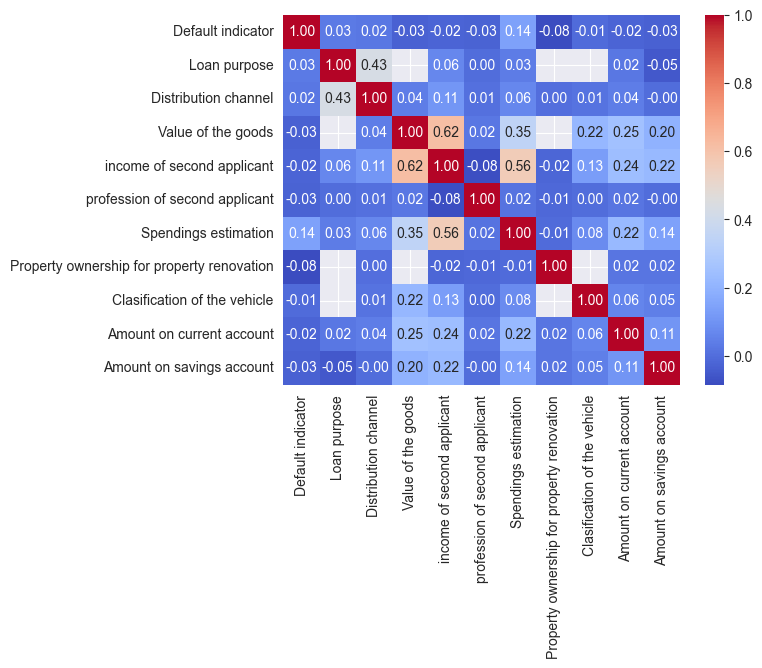

In [29]:
import seaborn as sns
list_of_col_null = list(null_columns.keys())
cor = data[list_of_col_null].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")


In [30]:
cor

,Default indicator,Loan purpose,Distribution channel,Value of the goods,income of second applicant,profession of second applicant,Spendings estimation,Property ownership for property renovation,Clasification of the vehicle,Amount on current account,Amount on savings account
Default indicator,1.000000,0.031035,0.022182,-0.031259,-0.020948,-0.026565,0.144134,-0.084227,-0.006108,-0.023048,-0.029676
Loan purpose,0.031035,1.000000,0.428868,NaN,0.064905,0.000417,0.034495,NaN,NaN,0.024279,-0.053749
Distribution channel,0.022182,0.428868,1.000000,0.041108,0.106951,0.008935,0.064977,0.003953,0.014978,0.041603,-0.003335
Value of the goods,-0.031259,NaN,0.041108,1.000000,0.616508,0.023385,0.347214,NaN,0.215483,0.252616,0.197350
income of second applicant,-0.020948,0.064905,0.106951,0.616508,1.000000,-0.078298,0.560097,-0.019762,0.129191,0.240480,0.224093
profession of second applicant,-0.026565,0.000417,0.008935,0.023385,-0.078298,1.000000,0.016512,-0.014163,0.000180,0.020339,-0.002557
Spendings estimation,0.144134,0.034495,0.064977,0.347214,0.560097,0.016512,1.000000,-0.006320,0.077759,0.224669,0.142901
Property ownership for property renovation,-0.084227,NaN,0.003953,NaN,-0.019762,-0.014163,-0.006320,1.000000,NaN,0.019602,0.019237
Clasification of the vehicle,-0.006108,NaN,0.014978,0.215483,0.129191,0.000180,0.077759,NaN,1.000000,0.060668,0.045190
Amount on current account,-0.023048,0.024279,0.041603,0.252616,0.240480,0.020339,0.224669,0.019602,0.060668,1.000000,0.105209


In [32]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool